# More Advanced $\chi^2$

In [2]:
from __future__ import print_function
%matplotlib inline
import numpy as np, pylab as plt

As before, suppose we have a constant function,
\begin{equation}
f(x)=\mu,
\end{equation}
which we have measured at various $x_i$'s, with noise:
\begin{equation}
y_i=f(x_i)+n_i,
\end{equation}
Let's again assume the noise is Gaussian, but now, each measurement has a different amount of noise, each characterized by a variance of $\sigma_i^2$.

<ErrorbarContainer object of 3 artists>

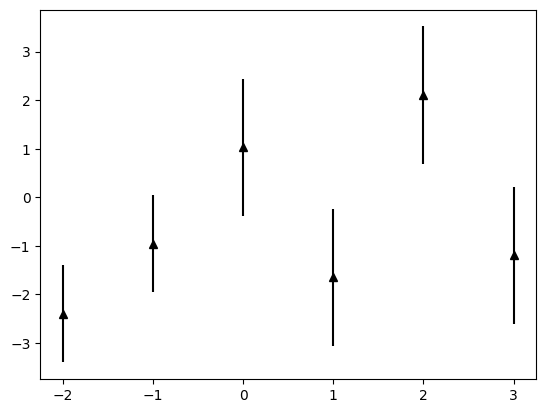

In [3]:
def f(x, mu=0.):
    return mu

xs = np.array([-2, -1, 0, 1, 2, 3], dtype=float)
ys = np.array([-2.404, -0.956,  1.030, -1.652,  2.104, -1.195])
var = np.array([1., 1., 2., 2., 2., 2.]) # variance

plt.figure()
plt.errorbar(xs, ys, np.sqrt(var), fmt='k^')

What is the best estimate of $\mu$?
- $\frac1N\sum_i^N{y_i}$
- $\frac1N\sum_i^N{y_i - n_i}$
- $\frac1{\sum{\sigma_i^2}}\sum_i^N{\sigma_i^2y_i}$
- $\frac1{\sum{\frac1{\sigma_i^2}}}\sum_i^N{\frac{y_i}{\sigma_i^2}}$

Let's start doing this computationally:

In [4]:
N = ys.size
option_1 = np.sum(ys) / N
#option_2 = np.sum(ys - ns)
option_2 = np.nan
option_3 = 1./np.sum(var) * np.sum(var * ys)
option_4 = 1./np.sum(1/var) * np.sum(ys / var)
options = [option_1, option_2, option_3, option_4]
for cnt,option in enumerate(options):
    print('Option %d:' % (cnt+1), option)

Option 1: -0.5121666666666668
Option 2: nan
Option 3: -0.2785999999999999
Option 4: -0.804125


So what was the answer? $\mu = -2$

In [5]:
mu = -2
for cnt, option in enumerate(options):
    print('Option %d:' % (cnt+1), np.abs(option - mu))

Option 1: 1.4878333333333331
Option 2: nan
Option 3: 1.7214
Option 4: 1.195875


The lesson here (which becomes more dramatic for increased $N$) is that *inverse variance* weighting is the most
sensitive weighting scheme: it minimizes the variance of the final answer.

For a proof, see https://en.wikipedia.org/wiki/Inverse-variance_weighting#Derivation


## The Big(ger) Guns

If you have a linear problem you are trying to solve (or if you can linearize it), you can do *much* better than this iterative mumbo-jumbo.  You can solve it in one shot!  Let's go back to our $y_i = mx_i +b + n_i$ example, but extend it to two dimensions: $z_i = ax_i+by_i+c + n_i$

You know what $x_i$ and $y_i$ are (they are the coordinates of your measurement), and you measured $z_i$.  It turns out you can frame the measurements you made as a matrix multiplication:

\begin{equation}
\left( \begin{smallmatrix} x_0&y_0&1 \\ x_1&y_1&1 \\ &\dots& \\ x_i & y_i & 1 \end{smallmatrix} \right)
\left( \begin{smallmatrix} a \\ b \\ c \end{smallmatrix}\right)
=
\left( \begin{smallmatrix} z_0 \\ z_1 \\ \dots \\ z_i \end{smallmatrix}\right)
\end{equation}

Let's define the first matrix to be $\mathbf{A}$, the second vector (our parameters to solve for) as $\vec p$, and our measurements $\vec z$.  Then the above equation reads:
\begin{equation}
\mathbf{A}\cdot\vec p = \vec z
\end{equation}
Because $\mathbf{A}$ is not a square matrix, it is not generally invertible, but $\mathbf{A}^\dagger \mathbf{A}$ is.  It will be, in this case, a 3x3 matrix.  This means we can re-write the above as:
\begin{equation}
\mathbf{A}^\dagger\mathbf{A}\cdot\vec p = \mathbf{A}^\dagger\vec z
\end{equation}
And then, constructing the matrix inverse $(\mathbf{A}^\dagger\mathbf{A})^{-1}$, and applying to both sides, we have:
\begin{equation}
\vec p = (\mathbf{A}^\dagger\mathbf{A})^{-1}\mathbf{A}^\dagger\vec z
\end{equation}

The final flourish is, if not all measurements have the same noise, to do inverse-variance weighting.  If we assume our noise for each measurement is independent, we can write down a noise matrix $\mathbf{N}$ that is diagonal and has $\sigma_i^2$ in each row corresponding
to the i$^{\rm th}$ measurement.  Then $\mathbf{N}^{-1}$ is the inverse variance weighting.
Adding that in at the beginning, we can run through the same math to get the final answer:
\begin{equation}
\vec p = (\mathbf{A}^\dagger\mathbf{N}^{-1}\mathbf{A})^{-1}\mathbf{A}^\dagger\mathbf{N}^{-1}\vec z
\end{equation}

In [6]:
print(np.linalg.lstsq.__doc__)


    Return the least-squares solution to a linear matrix equation.

    Computes the vector `x` that approximately solves the equation
    ``a @ x = b``. The equation may be under-, well-, or over-determined
    (i.e., the number of linearly independent rows of `a` can be less than,
    equal to, or greater than its number of linearly independent columns).
    If `a` is square and of full rank, then `x` (but for round-off error)
    is the "exact" solution of the equation. Else, `x` minimizes the
    Euclidean 2-norm :math:`||b - ax||`. If there are multiple minimizing
    solutions, the one with the smallest 2-norm :math:`||x||` is returned.

    Parameters
    ----------
    a : (M, N) array_like
        "Coefficient" matrix.
    b : {(M,), (M, K)} array_like
        Ordinate or "dependent variable" values. If `b` is two-dimensional,
        the least-squares solution is calculated for each of the `K` columns
        of `b`.
    rcond : float, optional
        Cut-off ratio for smal

In [7]:
xs = np.array([-2, -1, 0, 1, 2], dtype=float)
ys = np.array([-4.0761021 , -0.61376301,  0.96543424,  3.7373177 ,  3.86467818])
A = np.array([[-2,1],
              [-1,1],
              [ 0,1],
              [ 1,1],
              [ 2,1]])
print(np.linalg.lstsq(A, ys, rcond=None))

(array([2.02326413, 0.775513  ]), array([2.8835783]), 2, array([3.16227766, 2.23606798]))


In [15]:
import linsolve

In [20]:
data = {'a*x+y+z': 2., 'x-y-z':42}
ls = linsolve.LinearSolver(data, a=1)
ans = ls.solve()

In [21]:
print(ans)

{'x': 14.666666, 'y': -13.666667, 'z': -13.666667}


In [22]:
data = {'x+c*y': np.array([3,3,4]), 'd*x-y':np.array([3,5,5])}

In [23]:
ls = linsolve.LinearSolver(data, c=10, d=22)

In [24]:
ls.solve()

{'x': array([0.14932129, 0.23981903, 0.2443439 ], dtype=float32),
 'y': array([0.28506786, 0.27601808, 0.3755656 ], dtype=float32)}

In [25]:
ls = linsolve.LinProductSolver({'x*y+6*y*y':10, 'x*x+5*y':20}, {'x':1, 'y':1})
ls.solve()

{'x': 8.95238208770752, 'y': 0.6190475225448608}